# **Deep learning for business - Project**

## <font color="red"> **Convolutional Neural Network (CNN)**


###  <font color="purple"> **Import the images from Kaggle** </font>

<i> Link of the dataset : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset </i>

In [1]:
# Access the Kaggle API
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Create the directory "Kaggle"
!mkdir ~/.kaggle

In [3]:
# Import the file "kaggle.json" downloaded directly on Kaggle (API token)
!cp kaggle.json ~/.kaggle/

In [4]:
# Giving rw access
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the folder "vegetable-image-dataset" that contain the train and test data
!kaggle datasets download misrakahmed/vegetable-image-dataset

 99% 531M/534M [00:04<00:00, 120MB/s]
100% 534M/534M [00:04<00:00, 129MB/s]


In [6]:
# Unzip the previous folder to access the data
!unzip vegetable-image-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  in

In [7]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [8]:
# Generate batches of tensor image data with real-time data augmentation
train_datagenerator = ImageDataGenerator(rescale=1./255)
test_datagenerator = ImageDataGenerator(rescale=1./255)

In [9]:
# Train and test data
x_train = train_datagenerator.flow_from_directory(
    'Vegetable Images/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

x_test = test_datagenerator.flow_from_directory(
    'Vegetable Images/test',
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


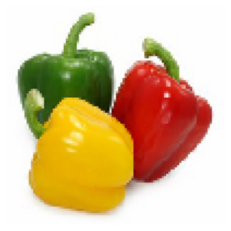

In [10]:
# Display an example of vegetable that we have in the train data (here a capsicum)
img = load_img('Vegetable Images/train/Capsicum/0006.jpg', target_size=(100, 100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [11]:
# Vegetable categories
vegetables = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

In [12]:
# Display the indices of the classes
x_train.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

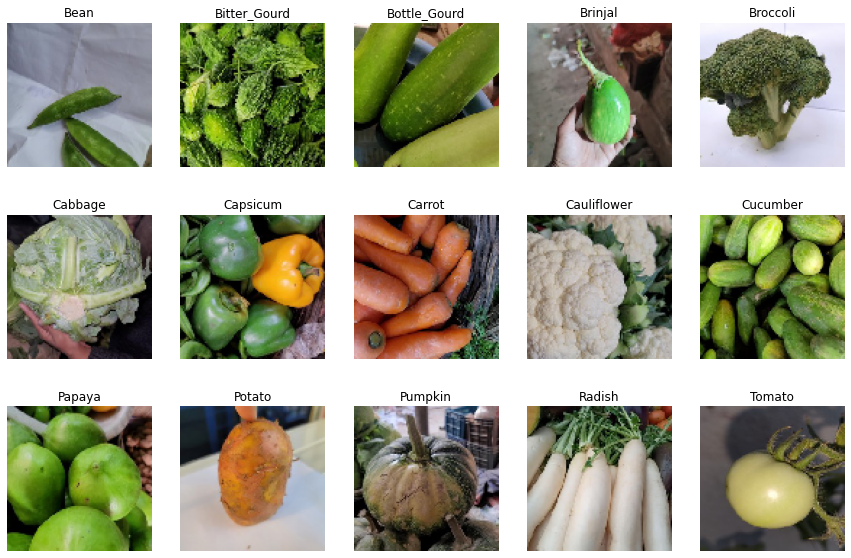

In [13]:
# Display a sample of images of each vegetable
fig = plt.figure(figsize =(15, 10))

for i in range(len(vegetables)):
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    plt.title(vegetables[i])
    plt.axis("off")
    ax.imshow(load_img('Vegetable Images/train/' + vegetables[i] + "/0028.jpg", target_size=(100,100)))

### <font color="purple"> **Convolutional neural network - Model 1** </font>

In [14]:
# Define the model
model_1 = Sequential()

model_1.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), data_format='channels_last', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Flatten())

model_1.add(Dense(units=128, activation='relu'))
model_1.add(Dropout(rate=0.5))
model_1.add(Dense(units=64, activation='relu'))
model_1.add(Dropout(rate=0.5))
model_1.add(Dense(units=15, activation='softmax'))

In [15]:
# Define a function to calculate the F1-score
def f1_score(y_actual, y_pred):
    y_pred = tf.round(y_pred)
    true_positive = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(y_actual, 1), tf.math.equal(y_pred, 1)), "float"), axis=0)
    false_positive = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(y_actual, 0), tf.math.equal(y_pred, 1)), "float"), axis=0)
    false_negative = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(y_actual, 1), tf.math.equal(y_pred, 0)), "float"), axis=0)
    precision = true_positive / (true_positive + false_positive + tf.keras.backend.epsilon())
    recall = true_positive / (true_positive + false_negative + tf.keras.backend.epsilon())
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1

In [16]:
# Compile the model
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), f1_score])

In [18]:
# Train the model
history_1 = model_1.fit(x_train, epochs=5, validation_data=x_test)

Epoch 1/5
469/469 [==============================] - 179s 381ms/step - loss: 0.9567 - accuracy: 0.6868 - recall: 0.5435 - precision: 0.8275 - f1_score: 0.5081 - val_loss: 0.4737 - val_accuracy: 0.8650 - val_recall: 0.7880 - val_precision: 0.9263 - val_f1_score: 0.7213
Epoch 2/5
469/469 [==============================] - 174s 370ms/step - loss: 0.7512 - accuracy: 0.7547 - recall: 0.6525 - precision: 0.8608 - f1_score: 0.6049 - val_loss: 0.3636 - val_accuracy: 0.8990 - val_recall: 0.8580 - val_precision: 0.9474 - val_f1_score: 0.7987
Epoch 3/5
469/469 [==============================] - 178s 379ms/step - loss: 0.6067 - accuracy: 0.8083 - recall: 0.7291 - precision: 0.8846 - f1_score: 0.6678 - val_loss: 0.2950 - val_accuracy: 0.9127 - val_recall: 0.8857 - val_precision: 0.9439 - val_f1_score: 0.7968
Epoch 4/5
469/469 [==============================] - 182s 387ms/step - loss: 0.5344 - accuracy: 0.8291 - recall: 0.7644 - precision: 0.8984 - f1_score: 0.7019 - val_loss: 0.2606 - val_accuracy:

In [19]:
# Accuracy / Recall / Precision / F1-score
test_loss, test_acc, test_recall, test_precision, test_f1_score = model_1.evaluate(x_test, verbose=2)

print(f"\nTest accuracy : {test_acc} \nTest recall : {test_recall} \nTest precision : {test_precision} \nTest F1-score : {test_f1_score}")

94/94 - 14s - loss: 0.2120 - accuracy: 0.9430 - recall: 0.9290 - precision: 0.9581 - f1_score: 0.8323 - 14s/epoch - 153ms/step

Test accuracy : 0.9430000185966492 
Test recall : 0.9290000200271606 
Test precision : 0.9580612182617188 
Test F1-score : 0.8323042988777161


### <font color="purple"> **Convolutional neural network - Model 2** </font>

In [20]:
# Define the model
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), data_format='channels_last', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())

model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(units=64, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(units=15, activation='softmax'))

In [21]:
# Compile the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), f1_score])

In [22]:
# Train the model
history_2 = model_2.fit(x_train, epochs=5, validation_data=x_test)

Epoch 1/5
469/469 [==============================] - 254s 535ms/step - loss: 2.0143 - accuracy: 0.3112 - recall_1: 0.1243 - precision_1: 0.6676 - f1_score: 0.1208 - val_loss: 1.1703 - val_accuracy: 0.5983 - val_recall_1: 0.4053 - val_precision_1: 0.8533 - val_f1_score: 0.3792
Epoch 2/5
469/469 [==============================] - 255s 543ms/step - loss: 1.2442 - accuracy: 0.5845 - recall_1: 0.4044 - precision_1: 0.7707 - f1_score: 0.3831 - val_loss: 0.7148 - val_accuracy: 0.7823 - val_recall_1: 0.6347 - val_precision_1: 0.9220 - val_f1_score: 0.5935
Epoch 3/5
469/469 [==============================] - 253s 540ms/step - loss: 0.9083 - accuracy: 0.7027 - recall_1: 0.5770 - precision_1: 0.8293 - f1_score: 0.5331 - val_loss: 0.5143 - val_accuracy: 0.8490 - val_recall_1: 0.7467 - val_precision_1: 0.9245 - val_f1_score: 0.6870
Epoch 4/5
469/469 [==============================] - 249s 531ms/step - loss: 0.6993 - accuracy: 0.7781 - recall_1: 0.6814 - precision_1: 0.8695 - f1_score: 0.6277 - val_

In [23]:
# Accuracy / Recall / Precision / F1-score
test_loss, test_acc, test_recall, test_precision, test_f1_score = model_2.evaluate(x_test, verbose=2)

print(f"\nTest accuracy : {test_acc} \nTest recall : {test_recall} \nTest precision : {test_precision} \nTest F1-score : {test_f1_score}")

94/94 - 18s - loss: 0.2884 - accuracy: 0.9140 - recall_1: 0.8823 - precision_1: 0.9477 - f1_score: 0.7926 - 18s/epoch - 194ms/step

Test accuracy : 0.9139999747276306 
Test recall : 0.8823333382606506 
Test precision : 0.9477264881134033 
Test F1-score : 0.7925865054130554


### <font color="purple"> **Convolutional neural network - Model 3** </font>

In [24]:
# Define the model
model_3 = Sequential()

model_3.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), data_format='channels_last', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Flatten())

model_3.add(Dense(units=128, activation='relu'))
model_3.add(Dropout(rate=0.5))
model_3.add(Dense(units=64, activation='relu'))
model_3.add(Dropout(rate=0.5))
model_3.add(Dense(units=15, activation='softmax'))

In [25]:
# Compile the model
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), f1_score])

In [26]:
# Train the model
history_3 = model_3.fit(x_train, epochs=5, validation_data=x_test)

Epoch 1/5
469/469 [==============================] - 412s 875ms/step - loss: 2.0338 - accuracy: 0.3088 - recall_2: 0.1255 - precision_2: 0.6776 - f1_score: 0.1242 - val_loss: 1.2120 - val_accuracy: 0.6293 - val_recall_2: 0.3363 - val_precision_2: 0.8661 - val_f1_score: 0.3180
Epoch 2/5
469/469 [==============================] - 424s 904ms/step - loss: 1.3263 - accuracy: 0.5553 - recall_2: 0.3777 - precision_2: 0.7714 - f1_score: 0.3597 - val_loss: 0.7618 - val_accuracy: 0.7813 - val_recall_2: 0.5953 - val_precision_2: 0.9136 - val_f1_score: 0.5584
Epoch 3/5
469/469 [==============================] - 420s 896ms/step - loss: 1.0359 - accuracy: 0.6627 - recall_2: 0.5177 - precision_2: 0.8158 - f1_score: 0.4860 - val_loss: 0.6162 - val_accuracy: 0.8247 - val_recall_2: 0.6920 - val_precision_2: 0.9289 - val_f1_score: 0.6357
Epoch 4/5
469/469 [==============================] - 422s 900ms/step - loss: 0.8858 - accuracy: 0.7165 - recall_2: 0.5897 - precision_2: 0.8405 - f1_score: 0.5457 - val_

In [27]:
# Accuracy / Recall / Precision / F1-score
test_loss, test_acc, test_recall, test_precision, test_f1_score = model_3.evaluate(x_test, verbose=2)

print(f"\nTest accuracy : {test_acc} \nTest recall : {test_recall} \nTest precision : {test_precision} \nTest F1-score : {test_f1_score}")

94/94 - 26s - loss: 0.3911 - accuracy: 0.8887 - recall_2: 0.8320 - precision_2: 0.9352 - f1_score: 0.7497 - 26s/epoch - 272ms/step

Test accuracy : 0.8886666893959045 
Test recall : 0.8320000171661377 
Test precision : 0.935181736946106 
Test F1-score : 0.7496921420097351


### <font color="purple"> **Convolutional neural network - Model 4** </font>

In [28]:
# Define the model
model_4 = Sequential()

model_4.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), data_format='channels_last', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Flatten())

model_4.add(Dense(units=128, activation='relu'))
model_4.add(Dropout(rate=0.5))
model_4.add(Dense(units=64, activation='relu'))
model_4.add(Dropout(rate=0.5))
model_4.add(Dense(units=15, activation='softmax'))

In [29]:
# Compile the model
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), f1_score])

In [30]:
# Train the model
history_4 = model_4.fit(x_train, epochs=5, validation_data=x_test)

Epoch 1/5
469/469 [==============================] - 249s 525ms/step - loss: 2.2453 - accuracy: 0.2117 - recall_3: 0.0451 - precision_3: 0.5705 - f1_score: 0.0442 - val_loss: 1.5920 - val_accuracy: 0.4520 - val_recall_3: 0.1217 - val_precision_3: 0.9171 - val_f1_score: 0.1134
Epoch 2/5
469/469 [==============================] - 277s 590ms/step - loss: 1.4774 - accuracy: 0.4782 - recall_3: 0.2661 - precision_3: 0.7283 - f1_score: 0.2545 - val_loss: 0.9411 - val_accuracy: 0.6927 - val_recall_3: 0.4957 - val_precision_3: 0.8727 - val_f1_score: 0.4610
Epoch 3/5
469/469 [==============================] - 244s 521ms/step - loss: 1.0415 - accuracy: 0.6458 - recall_3: 0.4825 - precision_3: 0.8015 - f1_score: 0.4529 - val_loss: 0.6352 - val_accuracy: 0.7797 - val_recall_3: 0.6947 - val_precision_3: 0.8898 - val_f1_score: 0.6262
Epoch 4/5
469/469 [==============================] - 250s 533ms/step - loss: 0.8179 - accuracy: 0.7265 - recall_3: 0.6035 - precision_3: 0.8364 - f1_score: 0.5593 - val_

In [31]:
# Accuracy / Recall / Precision / F1-score
test_loss, test_acc, test_recall, test_precision, test_f1_score = model_4.evaluate(x_test, verbose=2)

print(f"\nTest accuracy : {test_acc} \nTest recall : {test_recall} \nTest precision : {test_precision} \nTest F1-score : {test_f1_score}")

94/94 - 18s - loss: 0.3736 - accuracy: 0.8783 - recall_3: 0.8273 - precision_3: 0.9237 - f1_score: 0.7484 - 18s/epoch - 194ms/step

Test accuracy : 0.878333330154419 
Test recall : 0.8273333311080933 
Test precision : 0.9237067103385925 
Test F1-score : 0.7483606934547424


### <font color="purple"> **Convolutional neural network - Model 5** </font>

In [32]:
# Define the model
model_5 = Sequential()

model_5.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), data_format='channels_last', activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))

model_5.add(Flatten())

model_5.add(Dense(units=128, activation='relu'))
model_5.add(Dropout(rate=0.5))
model_5.add(Dense(units=64, activation='relu'))
model_5.add(Dropout(rate=0.5))
model_5.add(Dense(units=15, activation='softmax'))

In [33]:
# Compile the model
model_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), f1_score])

In [34]:
# Train the model
history_5 = model_5.fit(x_train, epochs=5, validation_data=x_test)

Epoch 1/5
469/469 [==============================] - 184s 388ms/step - loss: 2.2968 - accuracy: 0.1989 - recall_4: 0.0393 - precision_4: 0.5691 - f1_score: 0.0374 - val_loss: 1.6668 - val_accuracy: 0.3937 - val_recall_4: 0.1567 - val_precision_4: 0.7807 - val_f1_score: 0.1404
Epoch 2/5
469/469 [==============================] - 182s 389ms/step - loss: 1.6789 - accuracy: 0.4065 - recall_4: 0.1892 - precision_4: 0.6880 - f1_score: 0.1837 - val_loss: 1.1691 - val_accuracy: 0.6227 - val_recall_4: 0.3643 - val_precision_4: 0.8593 - val_f1_score: 0.3489
Epoch 3/5
469/469 [==============================] - 182s 387ms/step - loss: 1.2607 - accuracy: 0.5719 - recall_4: 0.3835 - precision_4: 0.7814 - f1_score: 0.3655 - val_loss: 0.8177 - val_accuracy: 0.7503 - val_recall_4: 0.5513 - val_precision_4: 0.9078 - val_f1_score: 0.5127
Epoch 4/5
469/469 [==============================] - 180s 384ms/step - loss: 1.0129 - accuracy: 0.6625 - recall_4: 0.5125 - precision_4: 0.8251 - f1_score: 0.4786 - val_

In [35]:
# Accuracy / Recall / Precision / F1-score
test_loss, test_acc, test_recall, test_precision, test_f1_score = model_5.evaluate(x_test, verbose=2)

print(f"\nTest accuracy : {test_acc} \nTest recall : {test_recall} \nTest precision : {test_precision} \nTest F1-score : {test_f1_score}")

94/94 - 14s - loss: 0.5750 - accuracy: 0.8230 - recall_4: 0.7383 - precision_4: 0.9142 - f1_score: 0.6756 - 14s/epoch - 153ms/step

Test accuracy : 0.8230000138282776 
Test recall : 0.7383333444595337 
Test precision : 0.9141560196876526 
Test F1-score : 0.6756412982940674


### <font color="purple"> **Best Convolutional neural network model - Model 1** </font>

In [36]:
# Reminder : Accuracy / Recall / Precision / F1-score of the best model
test_loss, test_acc, test_recall, test_precision, test_f1_score = model_1.evaluate(x_test, verbose=2)

print(f"\nTest accuracy : {test_acc} \nTest recall : {test_recall} \nTest precision : {test_precision} \nTest F1-score : {test_f1_score}")

94/94 - 14s - loss: 0.2120 - accuracy: 0.9430 - recall: 0.9290 - precision: 0.9581 - f1_score: 0.8232 - 14s/epoch - 154ms/step

Test accuracy : 0.9430000185966492 
Test recall : 0.9290000200271606 
Test precision : 0.9580612182617188 
Test F1-score : 0.8232147693634033


94/94 [==============================] - 16s 173ms/step


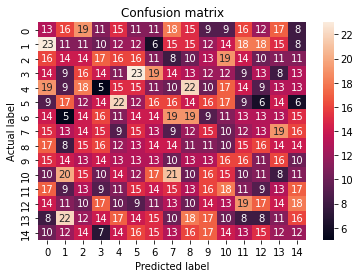

In [37]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_predictions = model_1.predict(x_test)
y_pred = np.argmax(y_predictions, axis=1) # y_pred = predicted labels

confusion_matrix = confusion_matrix(x_test.classes, y_pred) # x_test.classes = actual labels
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion matrix")
plt.show()

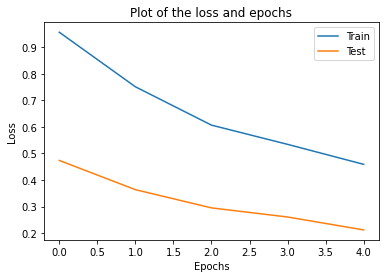

In [41]:
# Plot the loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Plot of the loss and epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

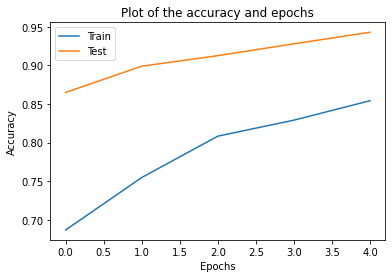

In [42]:
# Plot the accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Plot of the accuracy and epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### <font color="purple"> **Example of a prediction with the best model (model 1)** </font>

In [45]:
# Choose an image : here a papaya
img = image.load_img("Vegetable Images/test/Papaya/1212.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [46]:
# Prediction
pred = np.argmax(model_1.predict(x))
vegetables[pred]

# Comment :
# The image is a papaya and the model predict a papaya, so it seems to be a good model (good predictive power).

1/1 [==============================] - 0s 35ms/step


'Papaya'